<a href="https://colab.research.google.com/github/parham-nasiri/gpu_prediction/blob/main/Chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import json
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [13]:
from google.colab import files
#drive.mount('/content/drive')
#file_path = '/content/drive/MyDrive/gpu_data.txt'

uploaded = files.upload()

Saving gpu_data.txt to gpu_data (5).txt


In [14]:
#with open(file_path, "r") as f:
with open("gpu_data.txt", "r") as f:
  data = json.load(f)

In [15]:
all_rows = []

for item in data["data"]["result"]:
    gpu_name = item["metric"]["gpu"]
    values = item["values"]

    for timestamp, value in values:
        all_rows.append({
            "gpu": gpu_name,
            "timestamp": int(timestamp),
            "value": float(value)
        })

df = pd.DataFrame(all_rows)

In [16]:
df["datetime"] = pd.to_datetime(df["timestamp"], unit="s")

df["date"] = df["datetime"].dt.date
df["hour"] = df["datetime"].dt.hour

/tmp/ipython-input-5577/3728377985.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  six_hour = gpu_df["value"].resample("6H").mean()


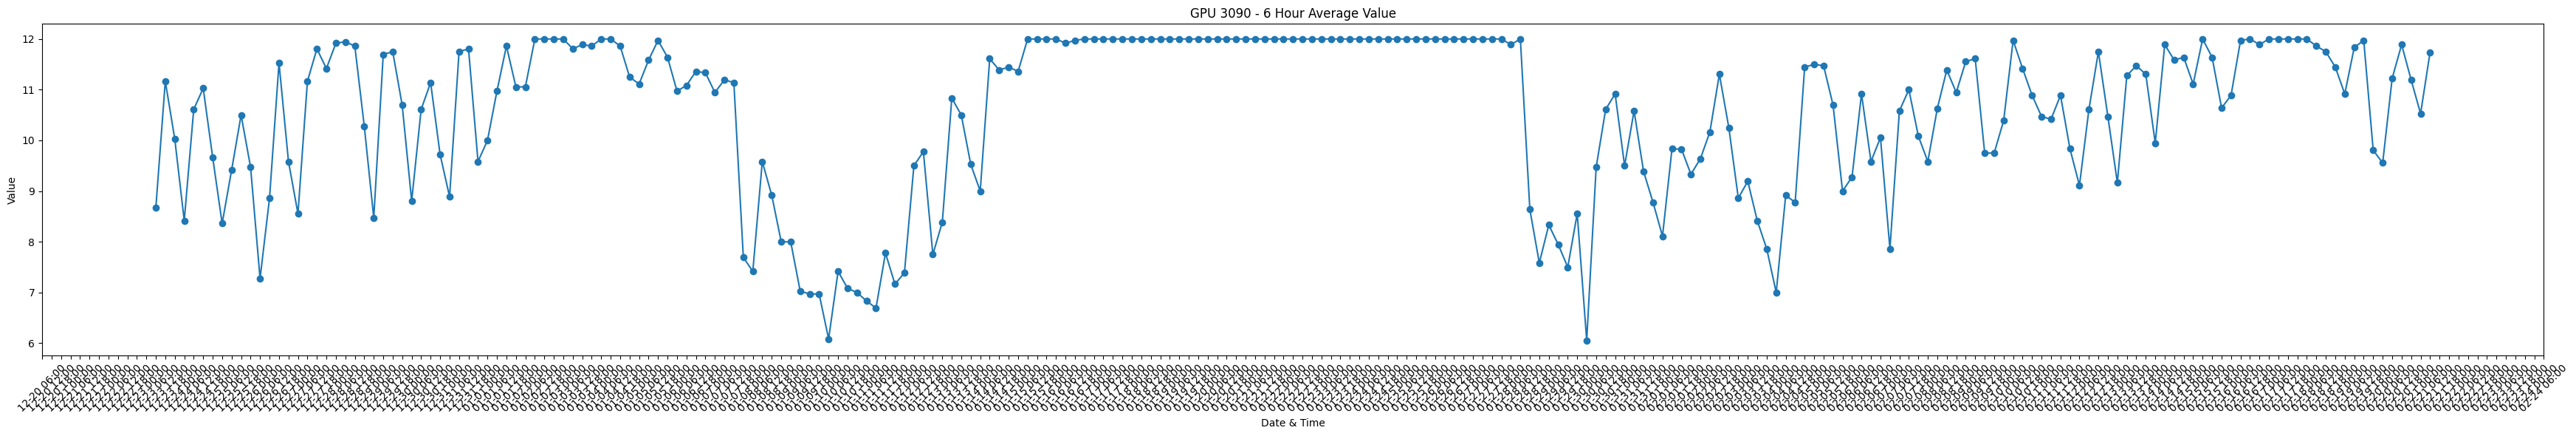

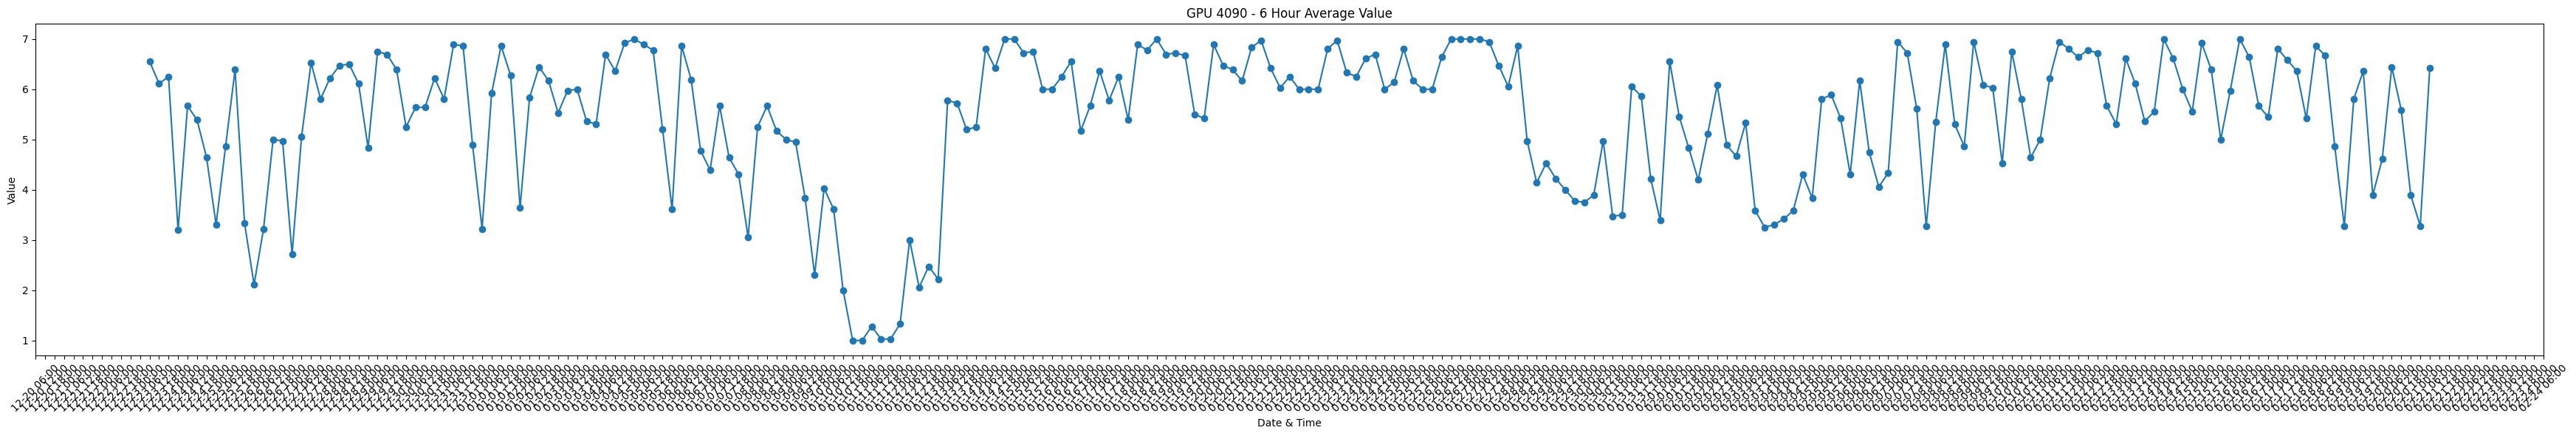

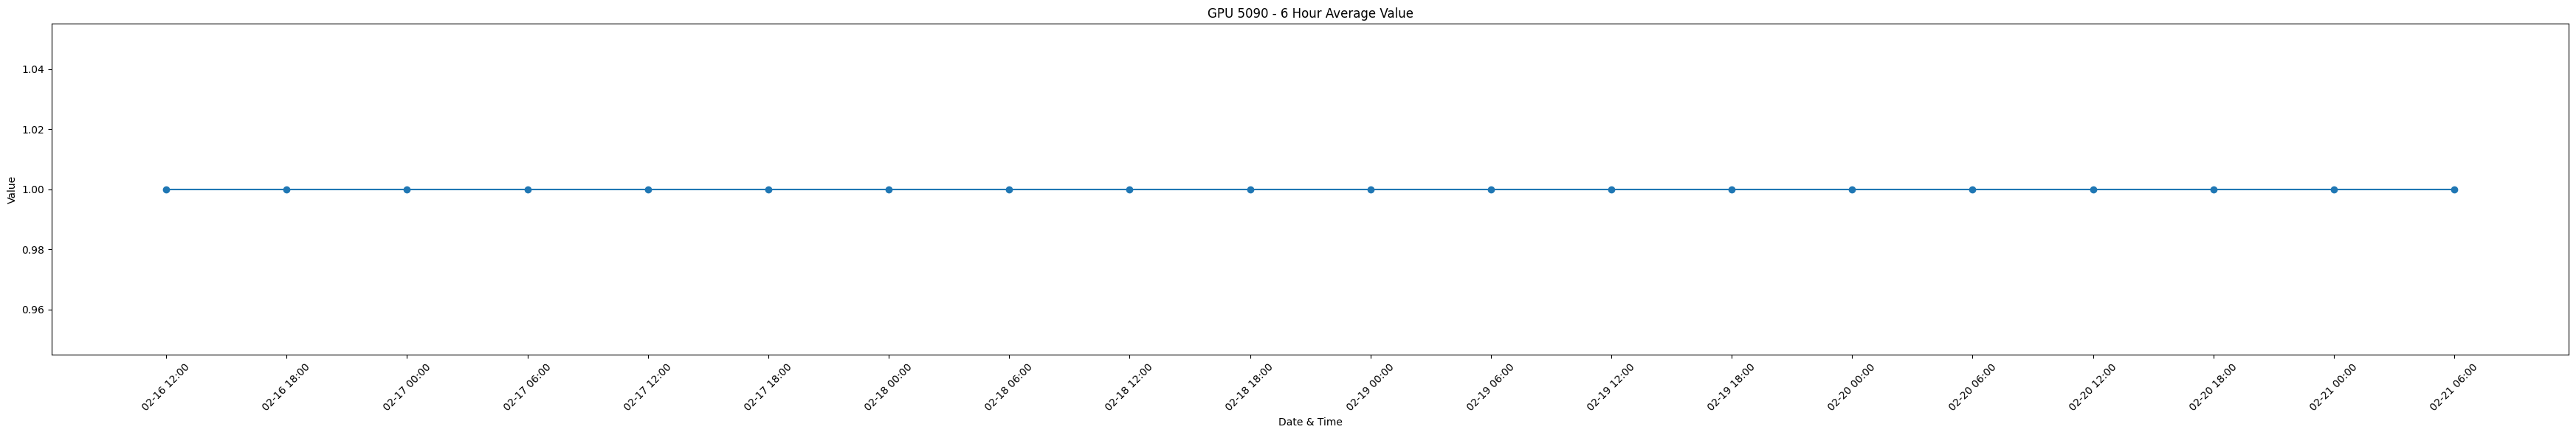

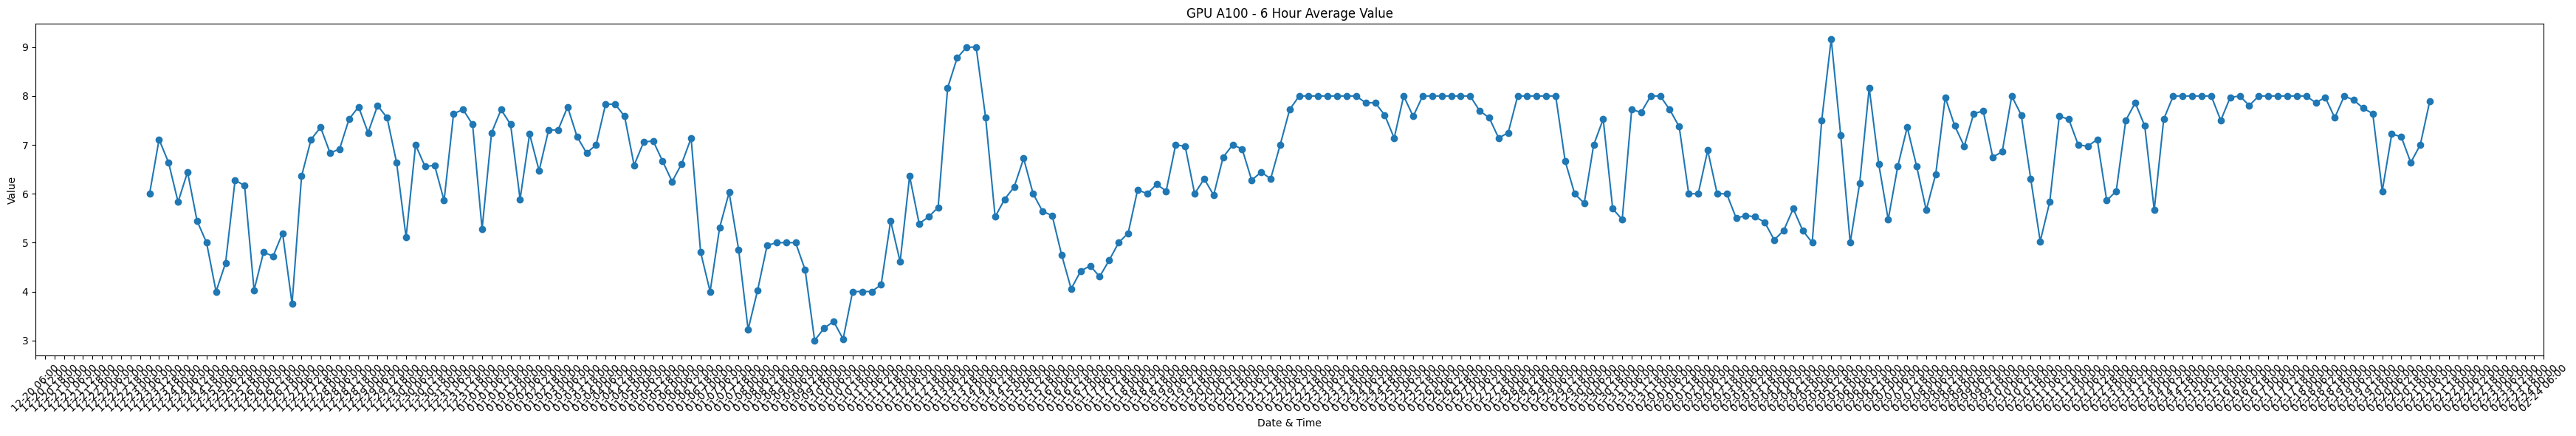

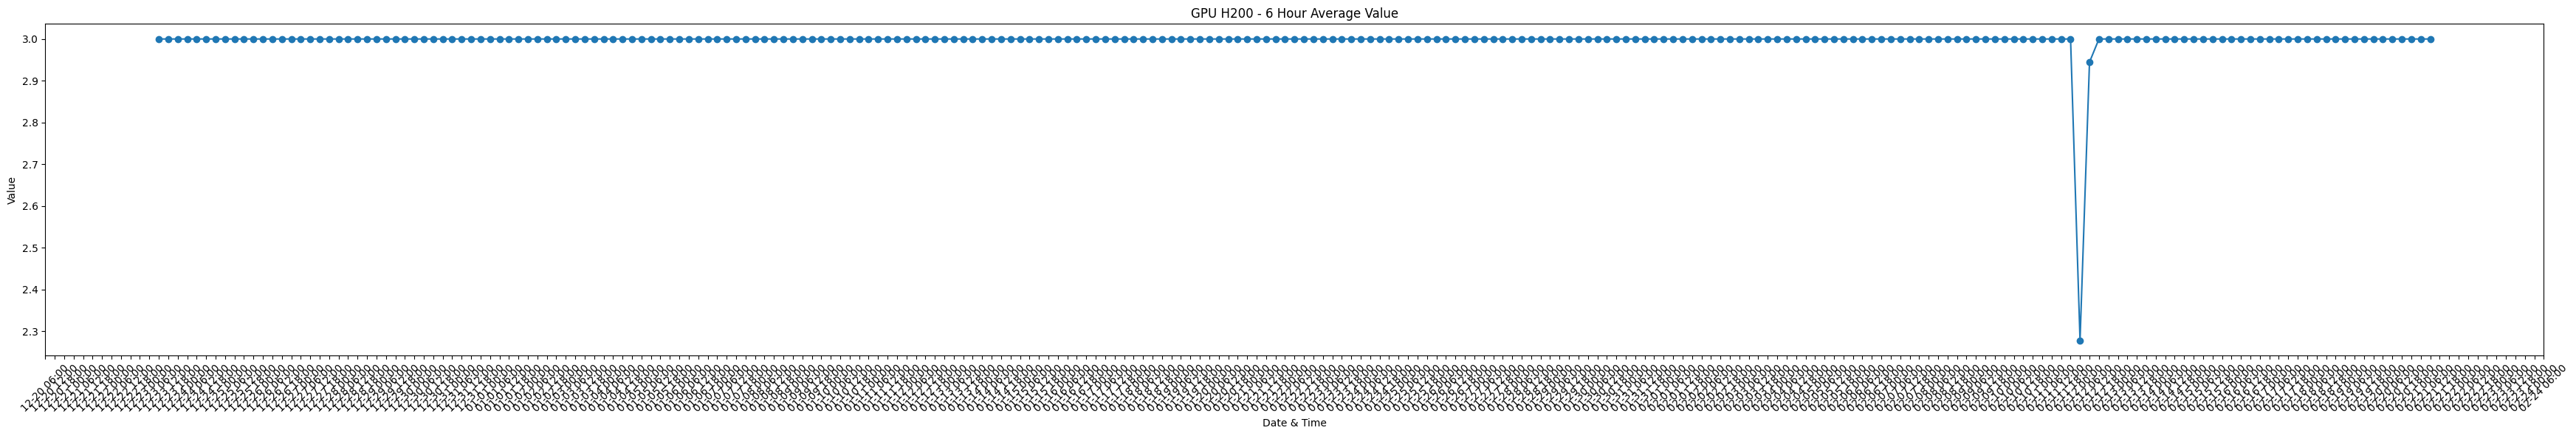

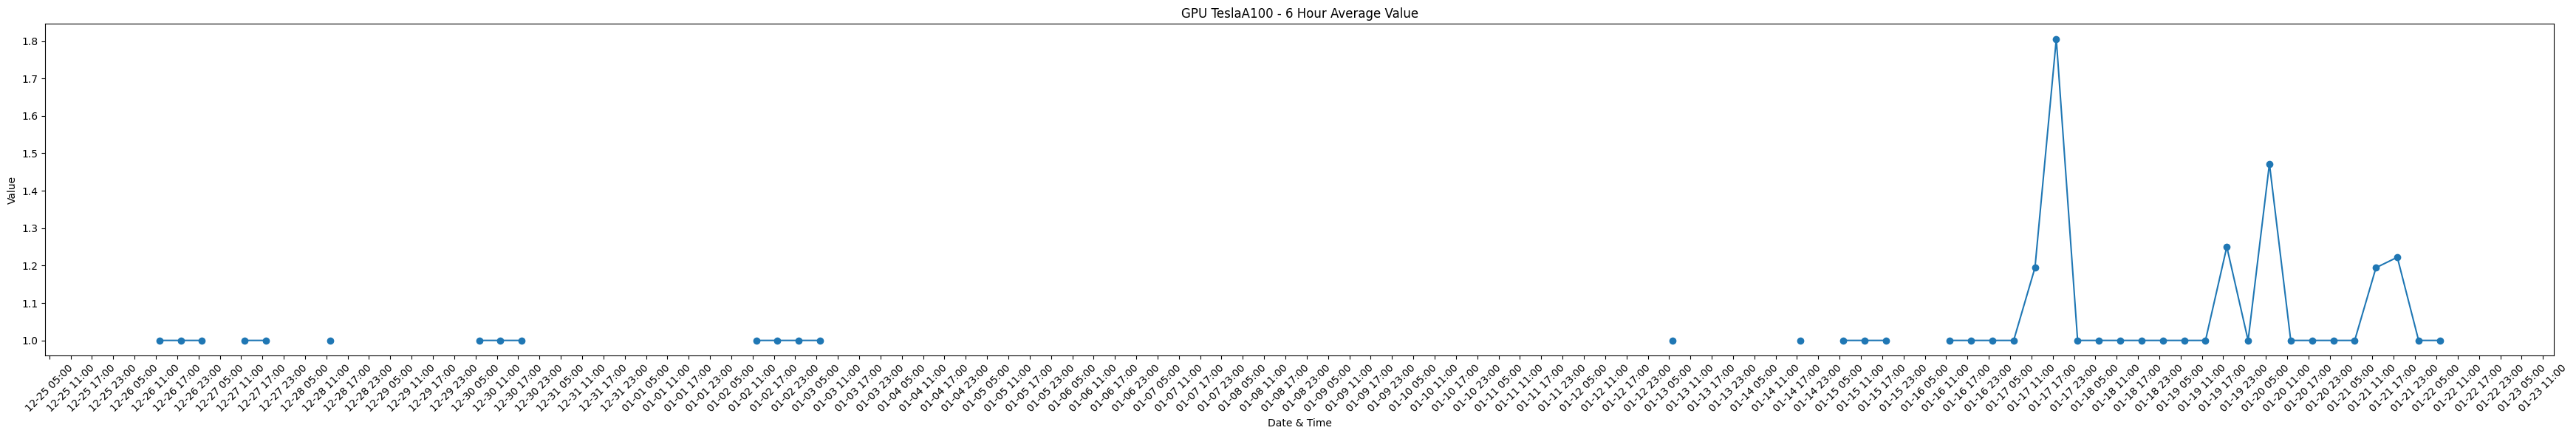

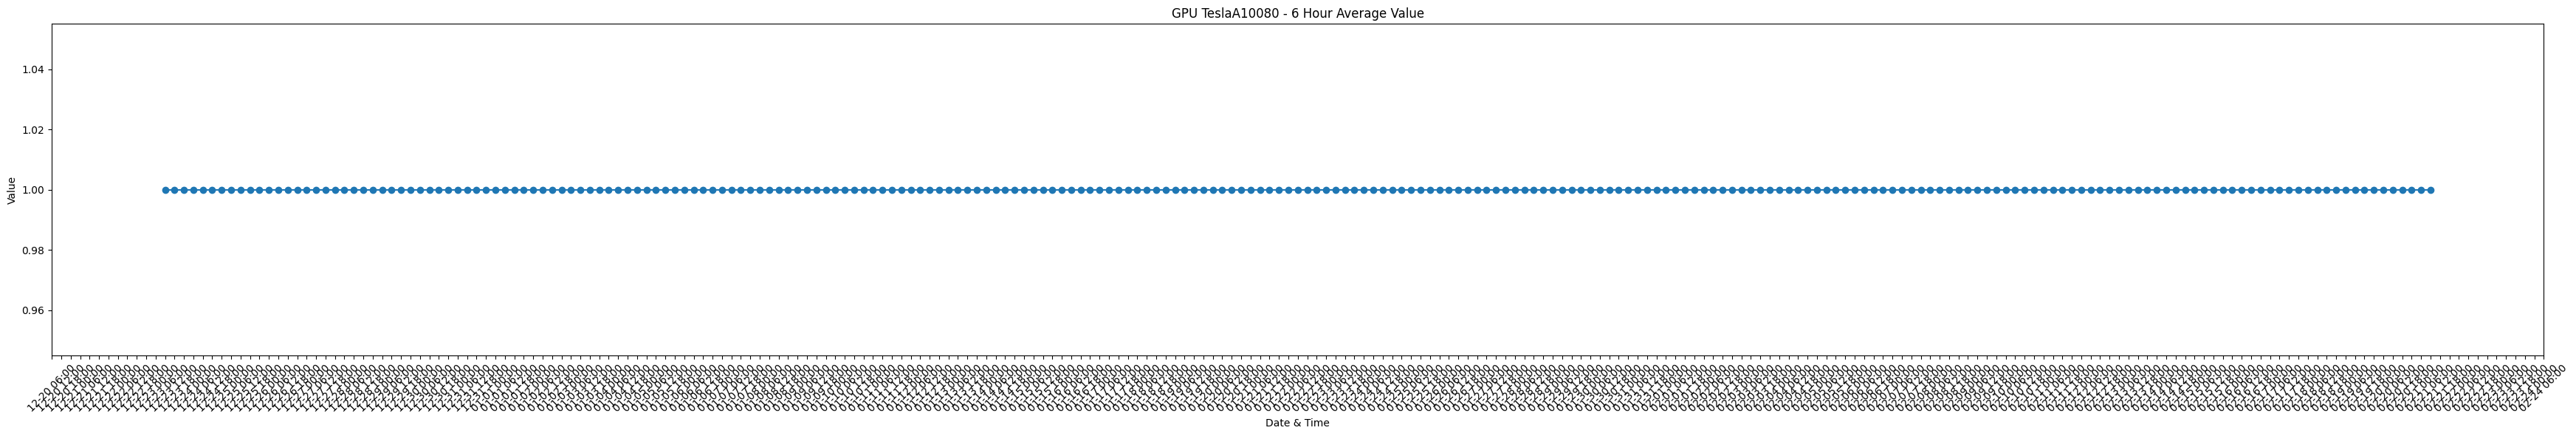

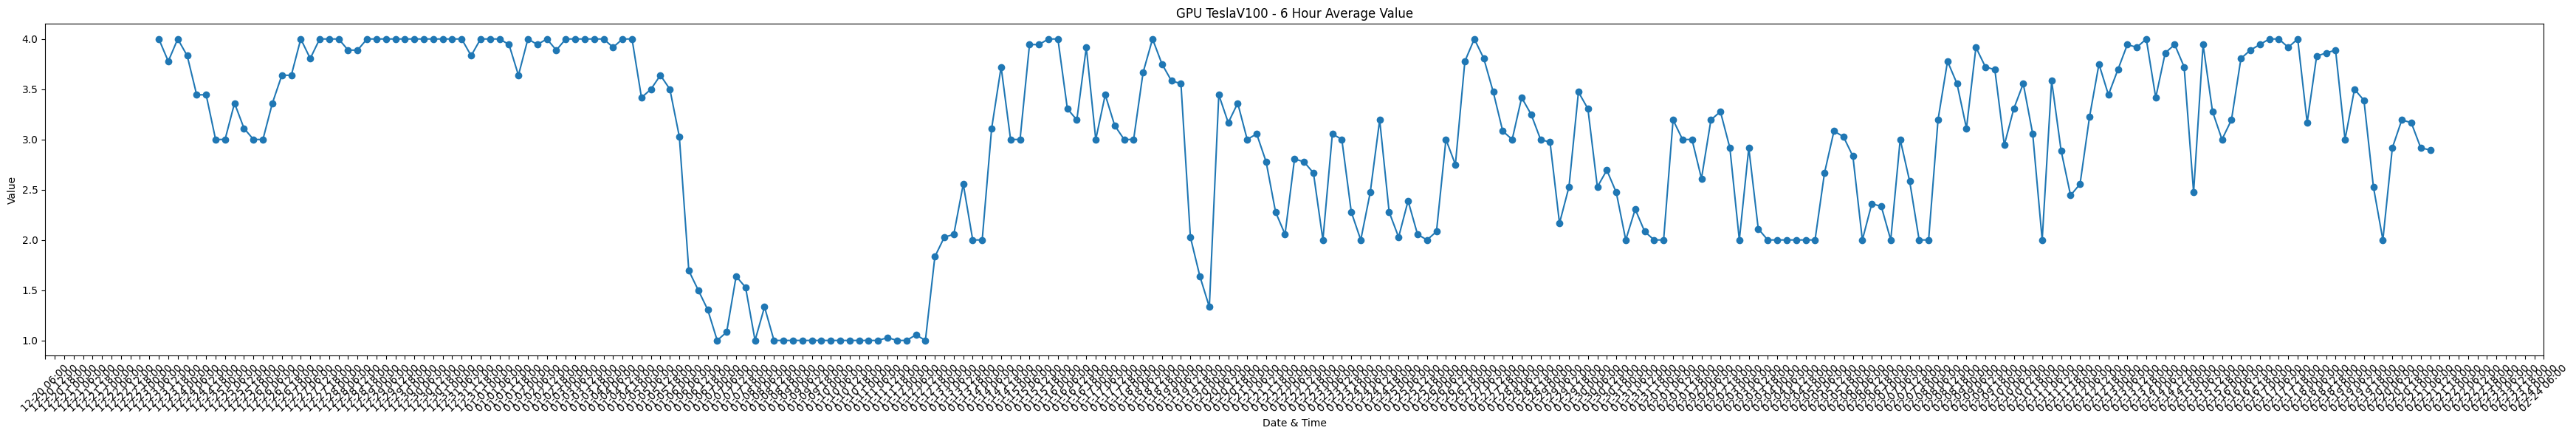

In [17]:


gpus = df["gpu"].unique()

for gpu in gpus:
    gpu_df = df[df["gpu"] == gpu].copy()

    gpu_df.set_index('datetime', inplace=True)

    six_hour = gpu_df["value"].resample("6H").mean()

    fig, ax = plt.subplots(figsize=(35,6))
    ax.plot(six_hour.index, six_hour.values, marker='o')

    ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))

    plt.xticks(rotation=45)
    plt.title(f"GPU {gpu} - 6 Hour Average Value")
    plt.xlabel("Date & Time")
    plt.ylabel("Value")
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-5577/4281233264.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  six_hour = gpu_df["value"].resample("12H").mean()


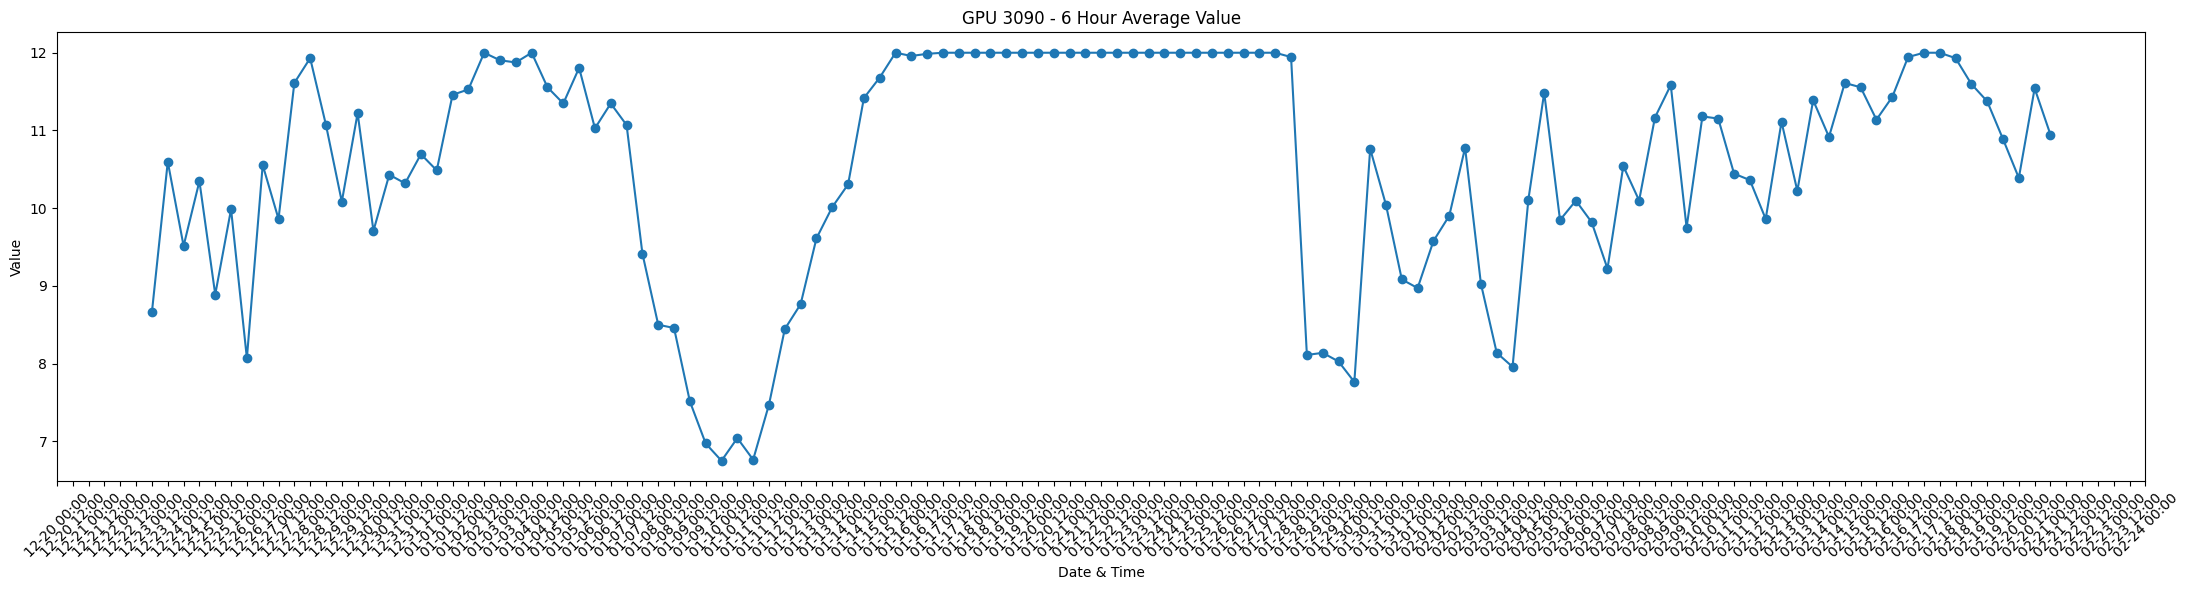

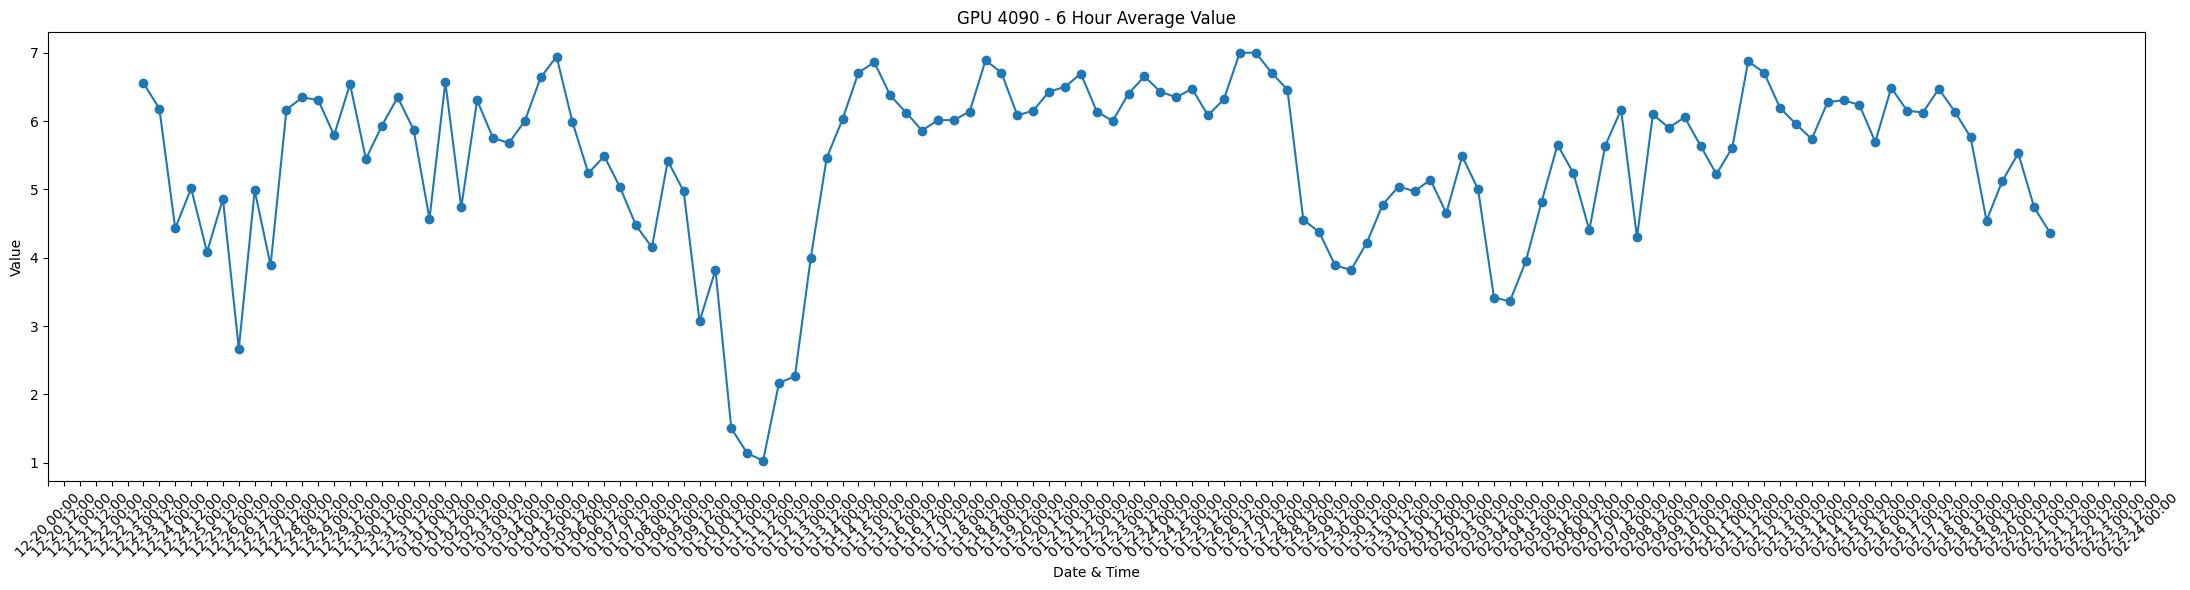

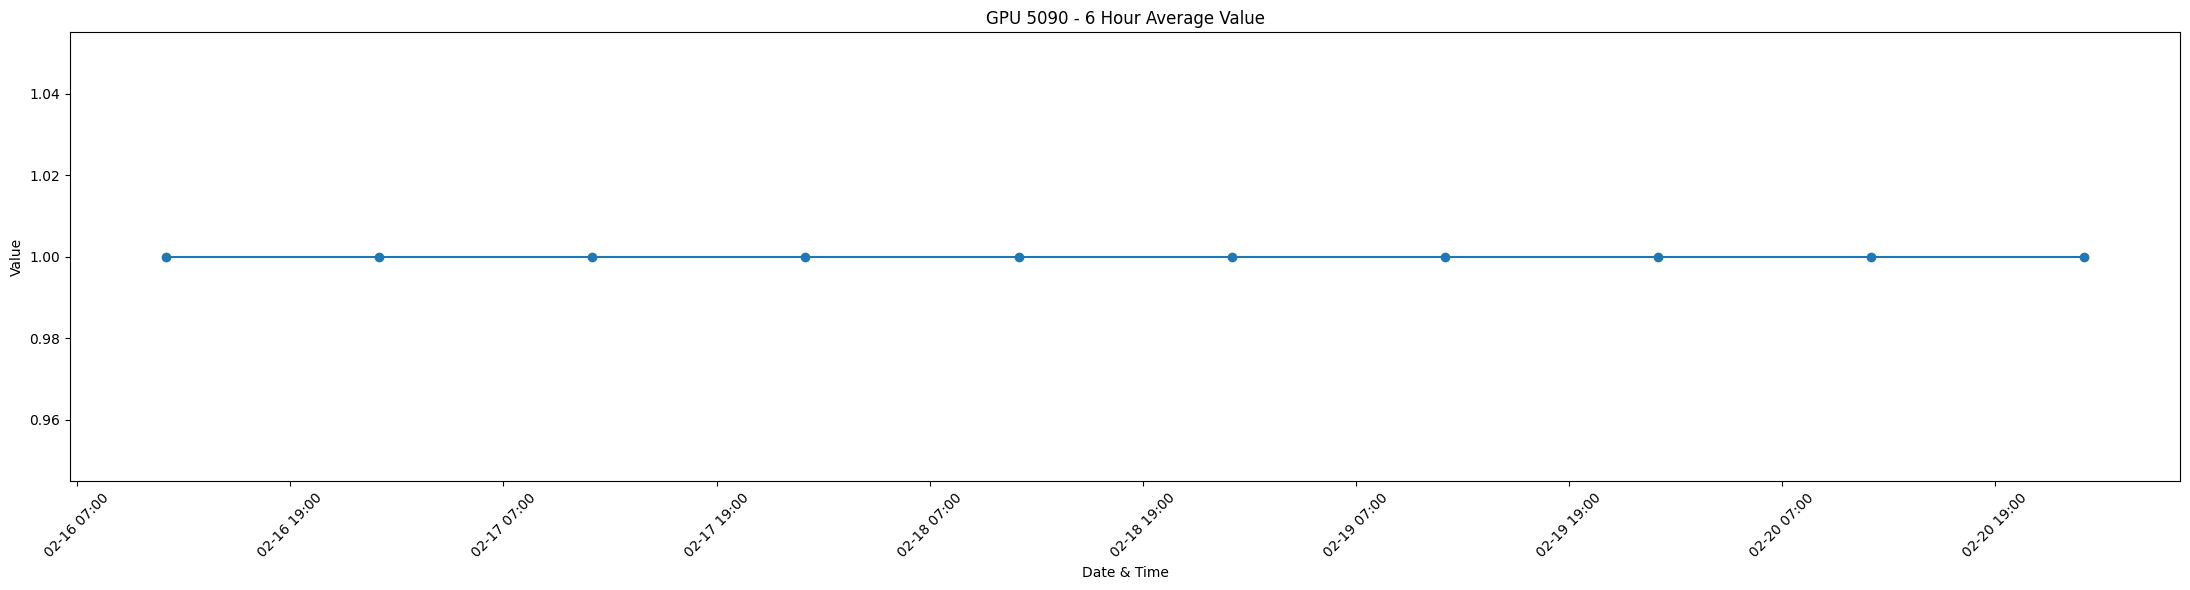

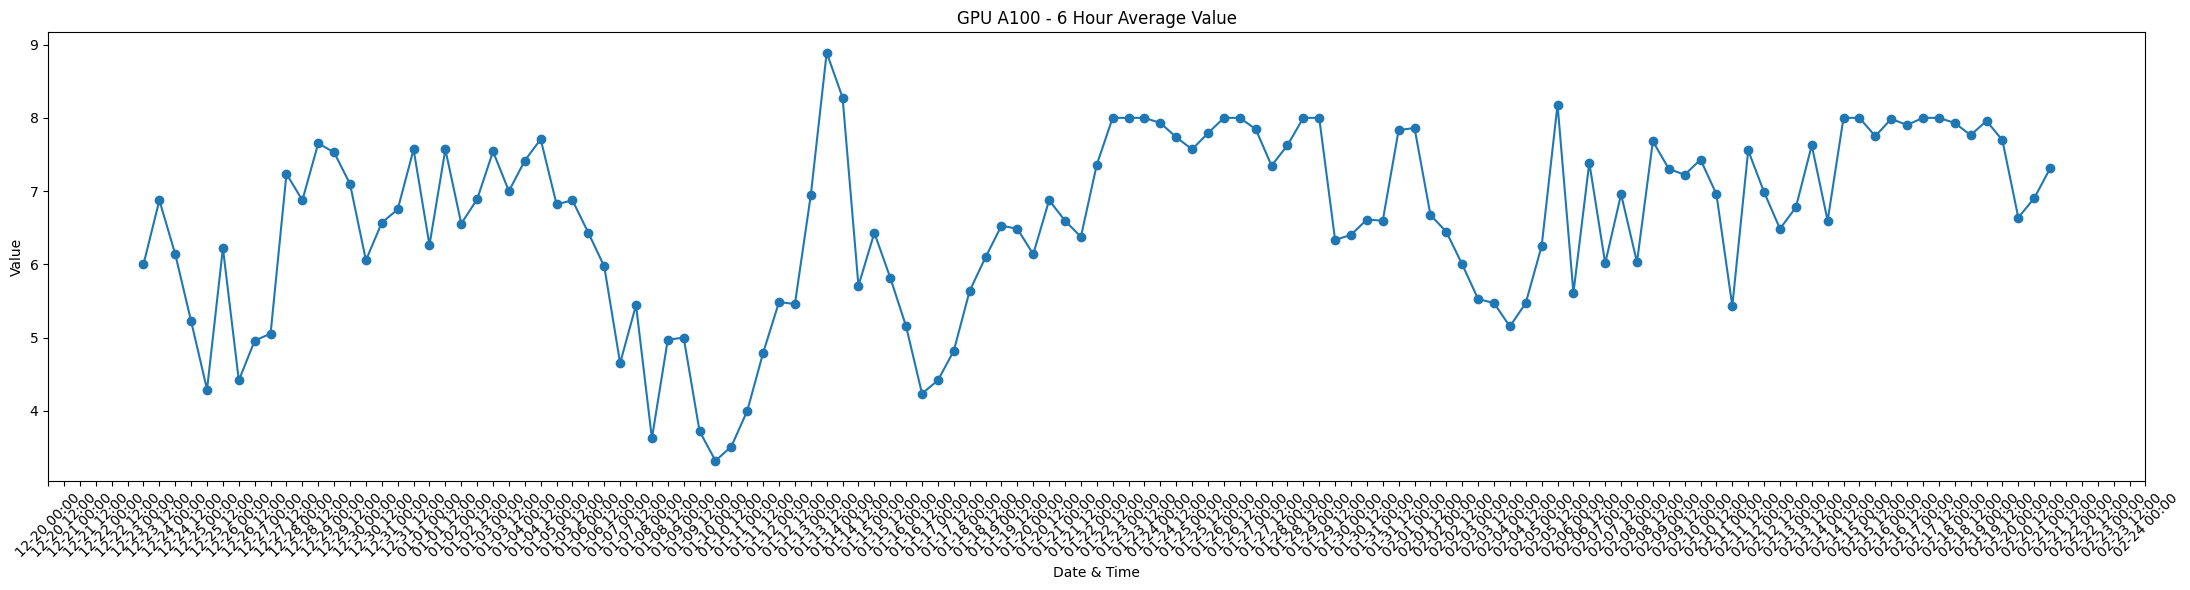

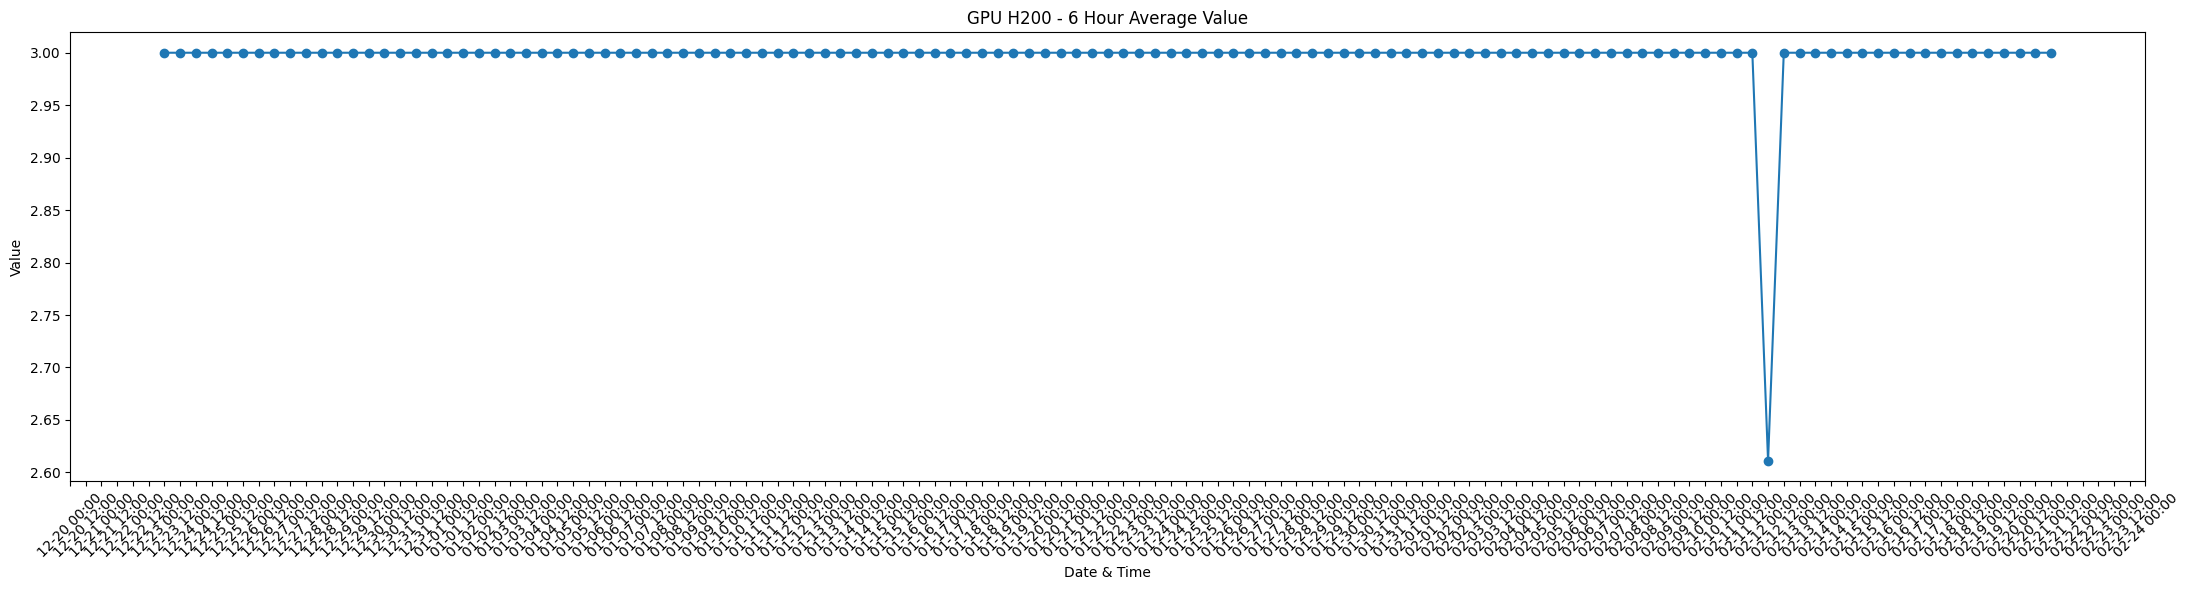

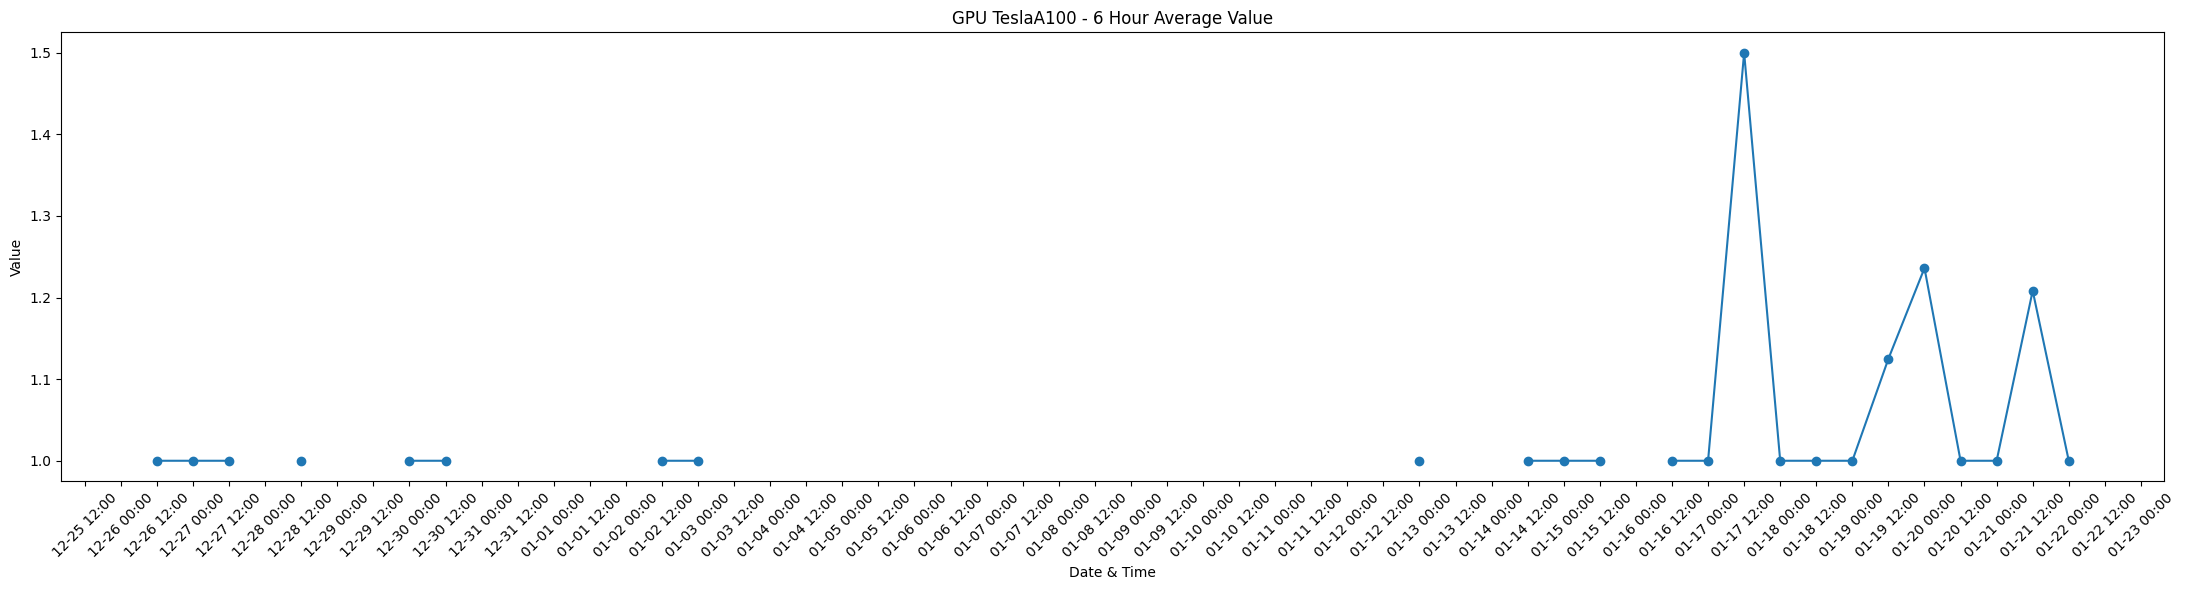

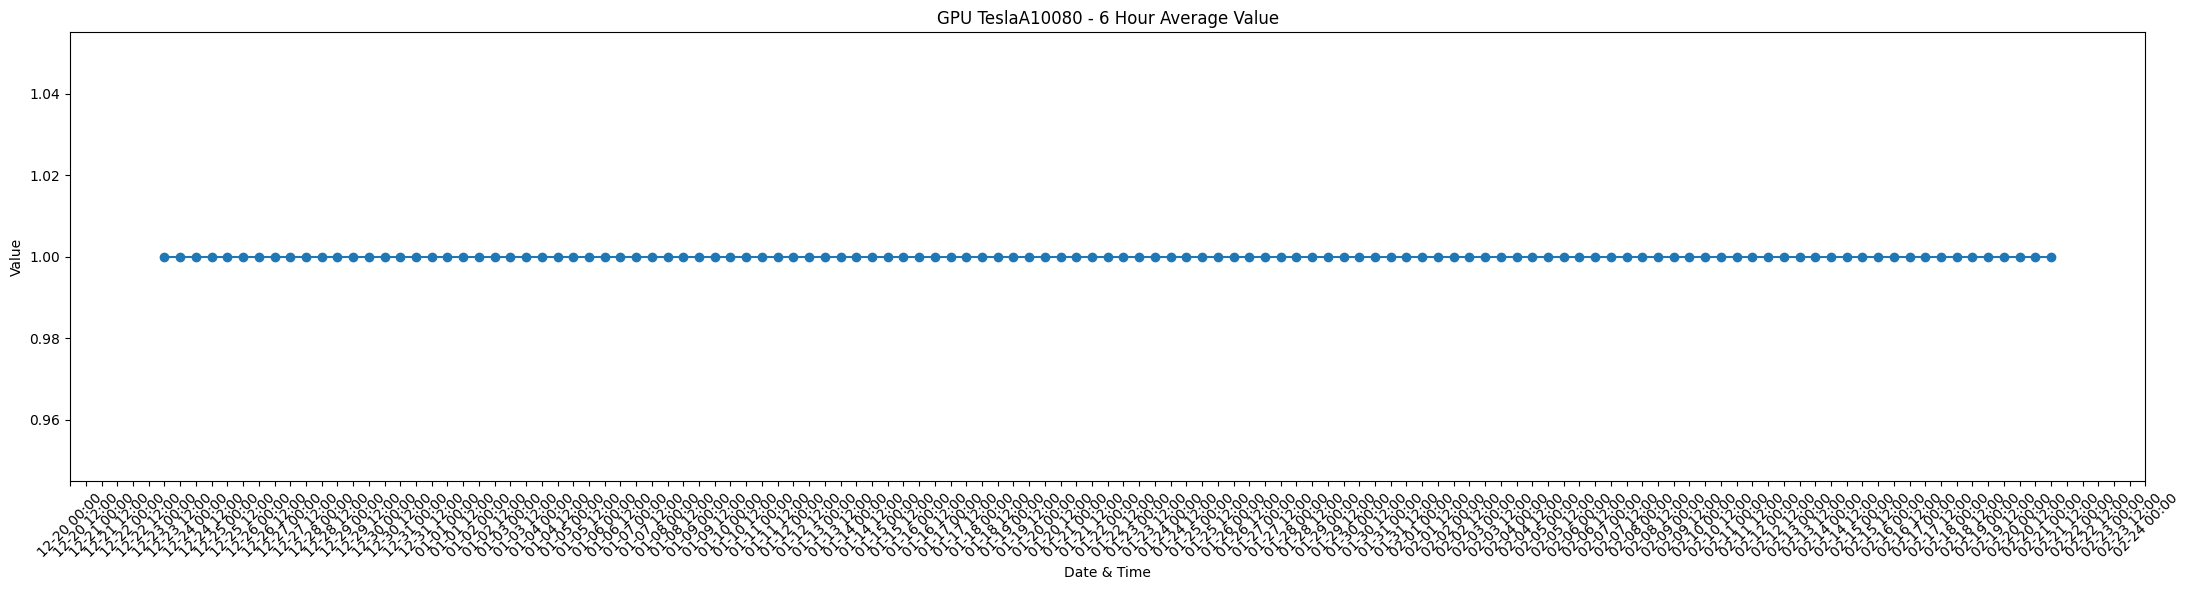

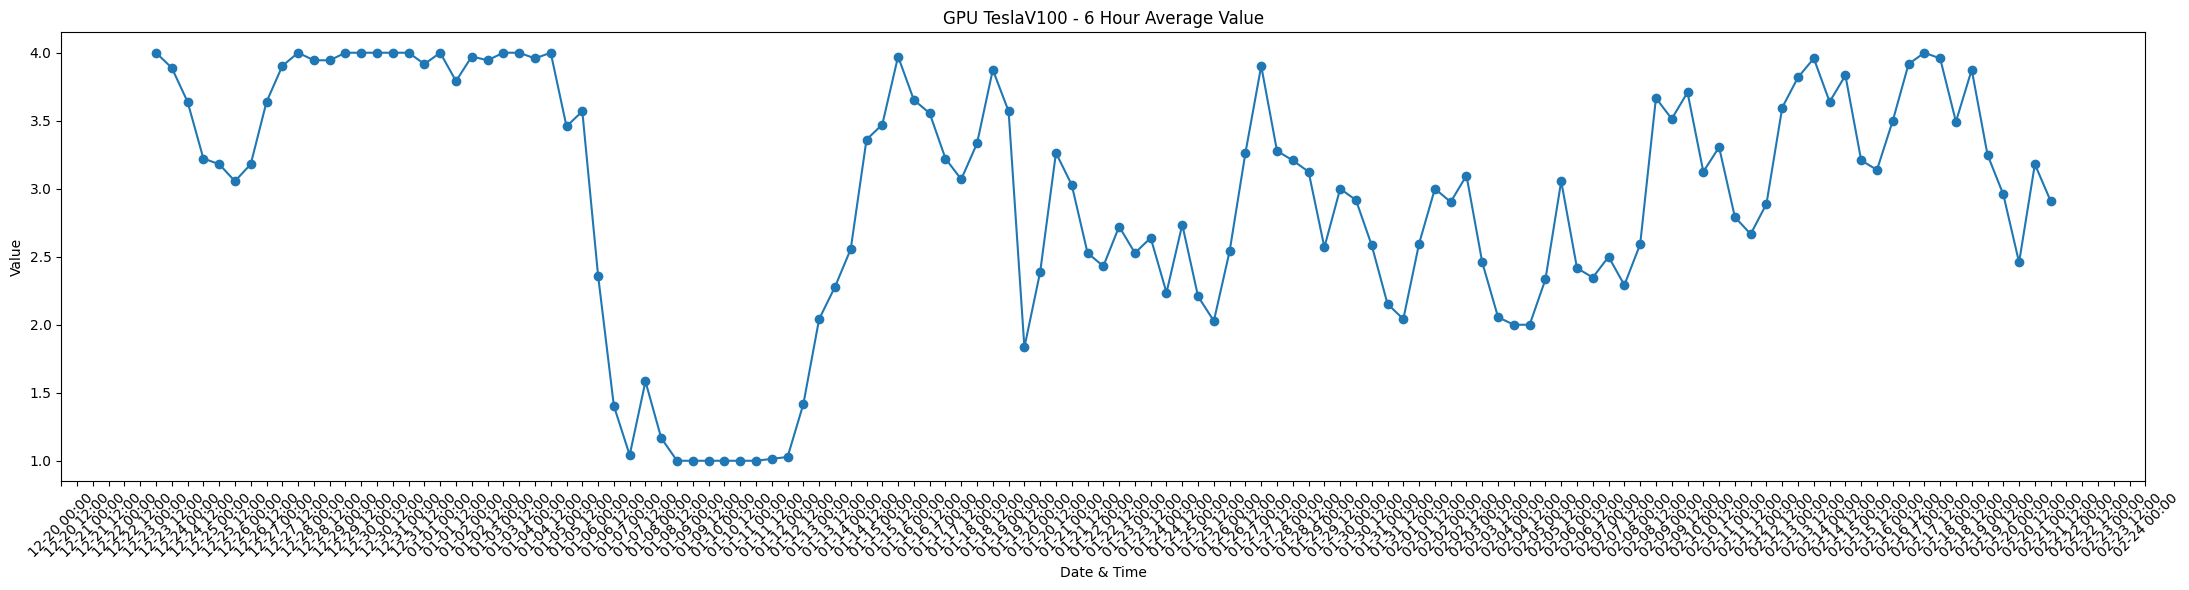

In [18]:


gpus = df["gpu"].unique()

for gpu in gpus:
    gpu_df = df[df["gpu"] == gpu].copy()

    gpu_df.set_index('datetime', inplace=True)

    six_hour = gpu_df["value"].resample("12H").mean()

    fig, ax = plt.subplots(figsize=(22,6))
    ax.plot(six_hour.index, six_hour.values, marker='o')

    ax.xaxis.set_major_locator(mdates.HourLocator(interval=12))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))

    plt.xticks(rotation=45)
    plt.title(f"GPU {gpu} - 6 Hour Average Value")
    plt.xlabel("Date & Time")
    plt.ylabel("Value")
    plt.tight_layout()
    plt.show()

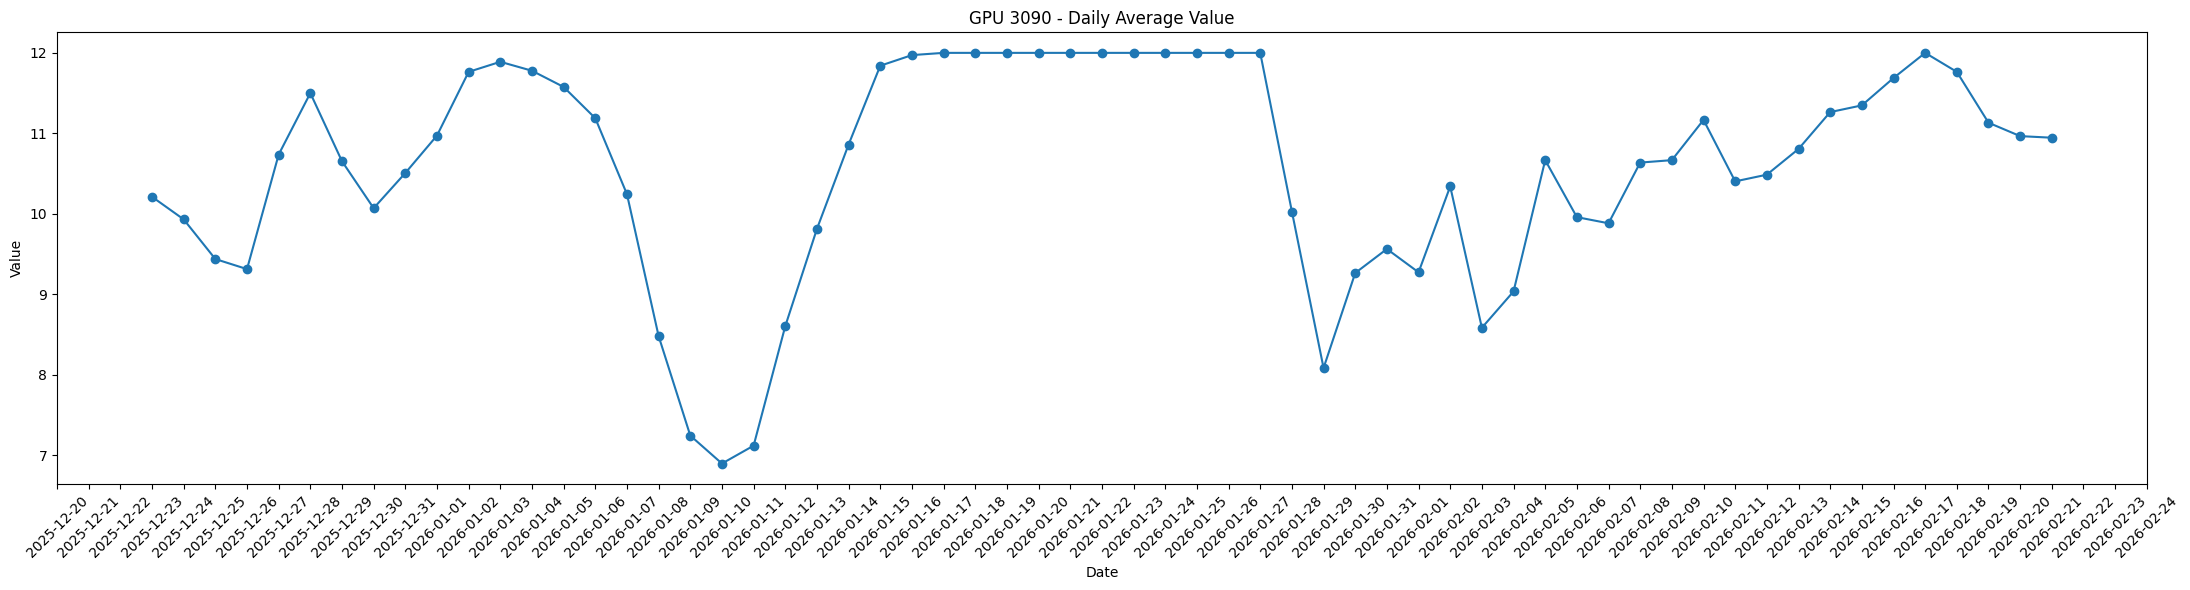

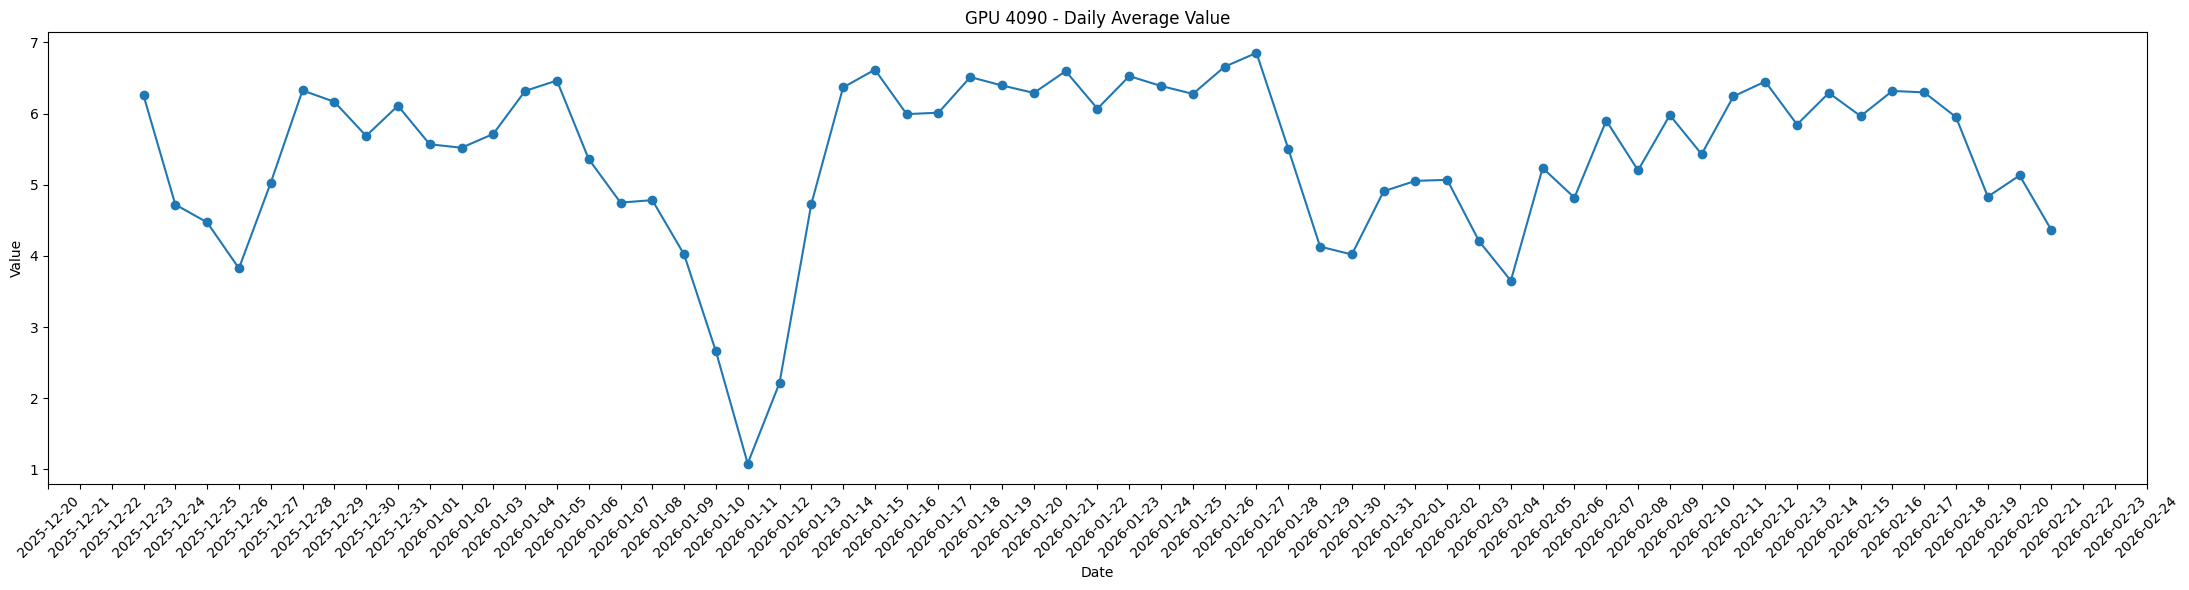

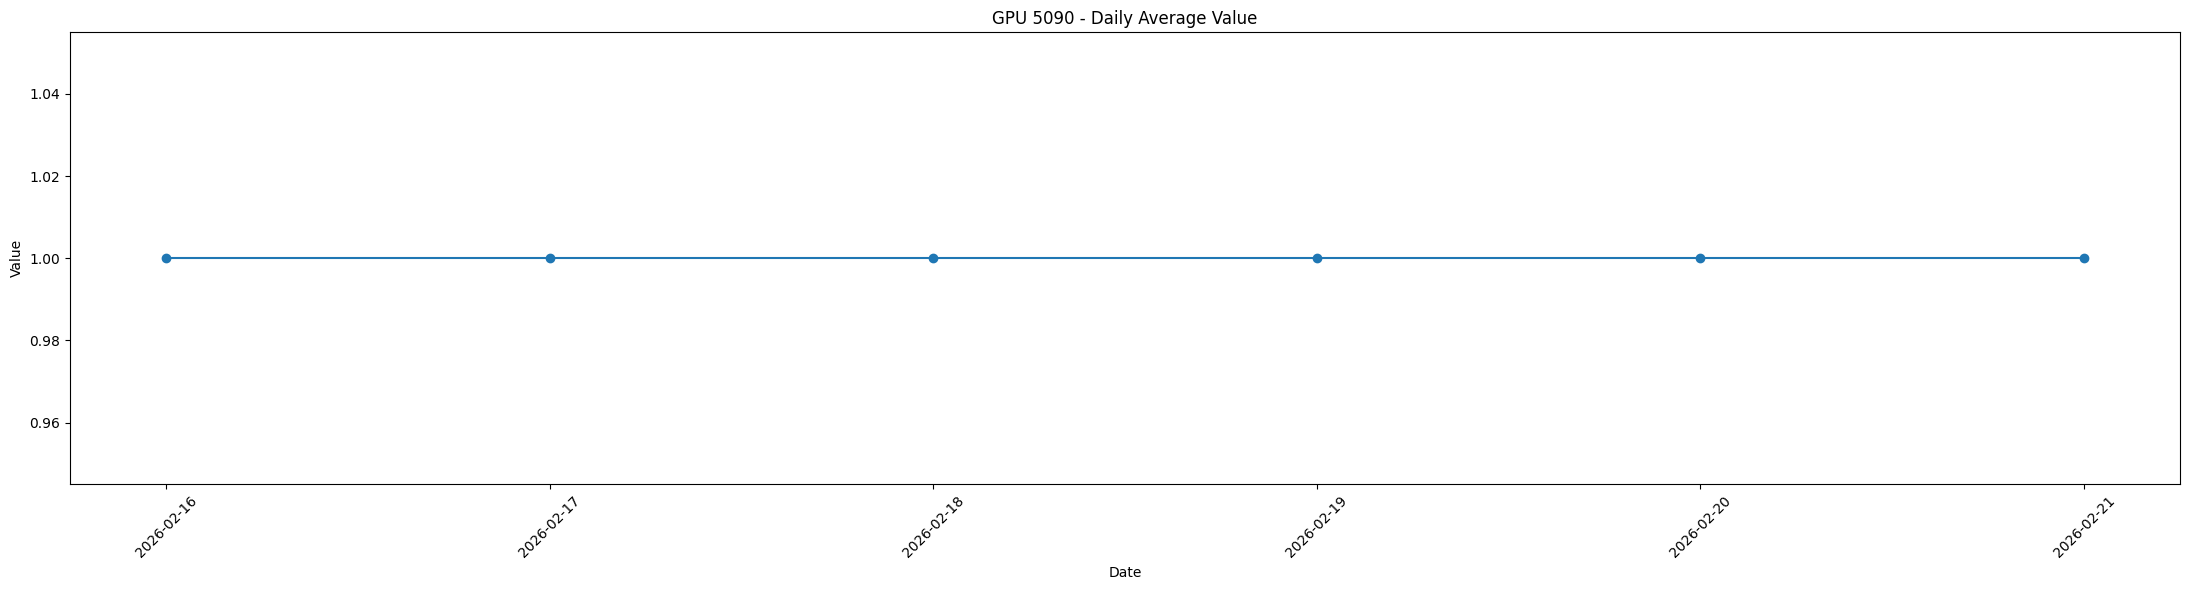

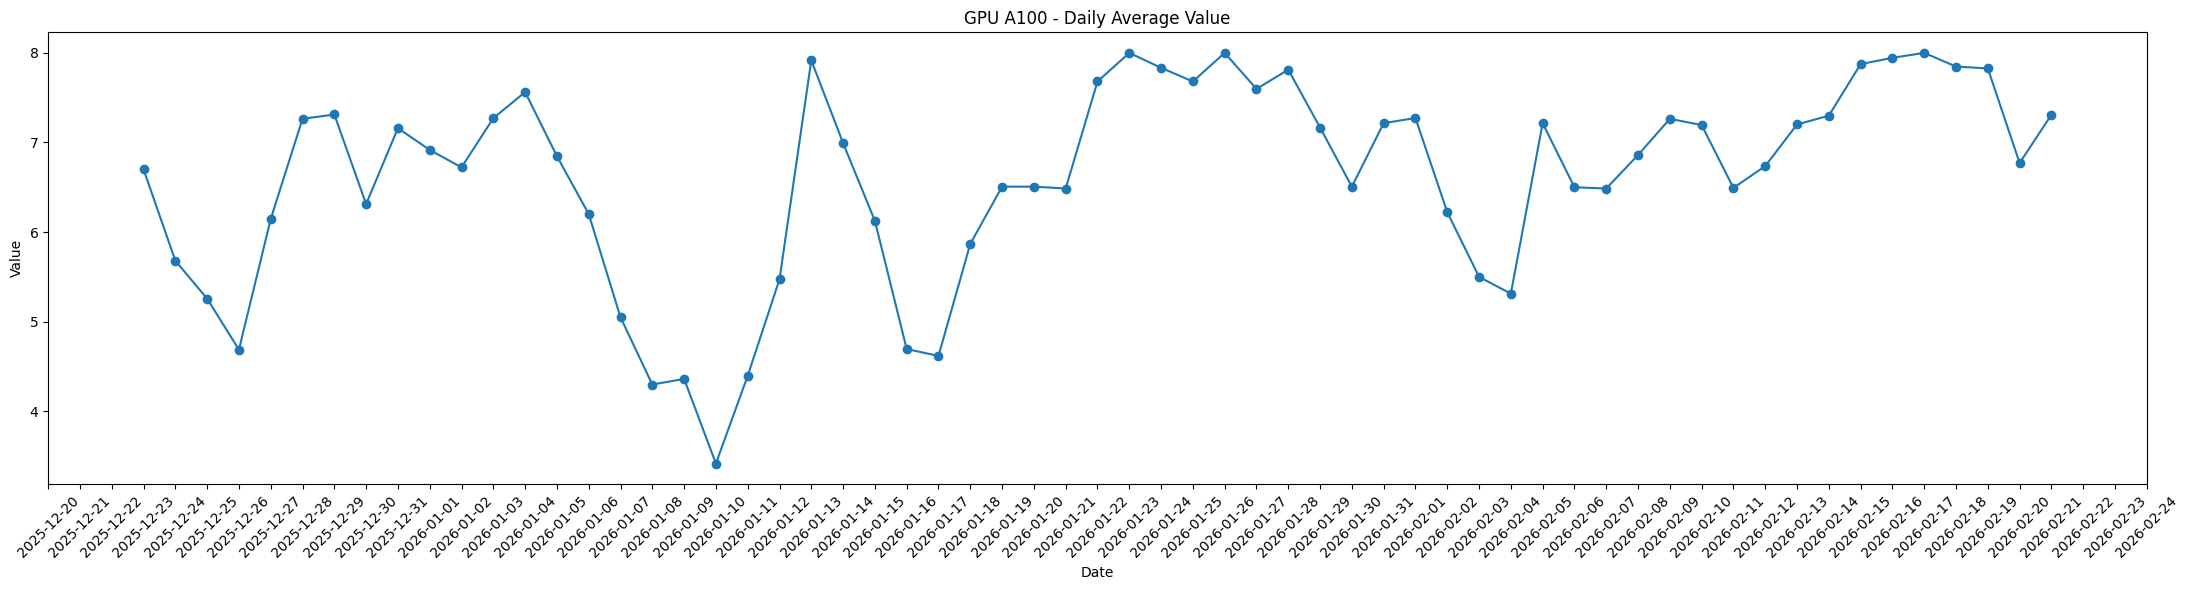

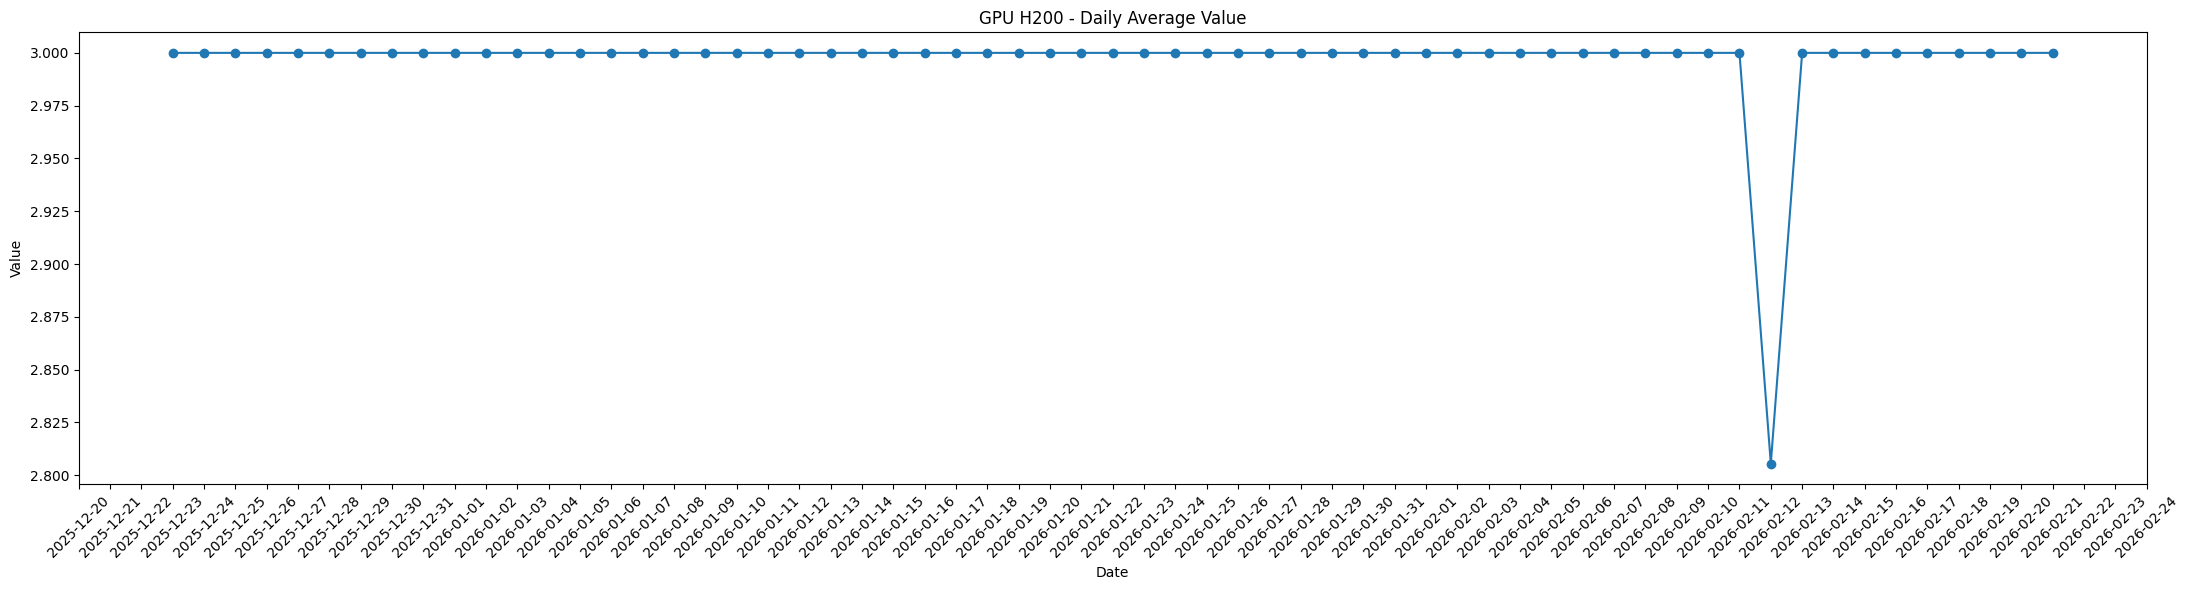

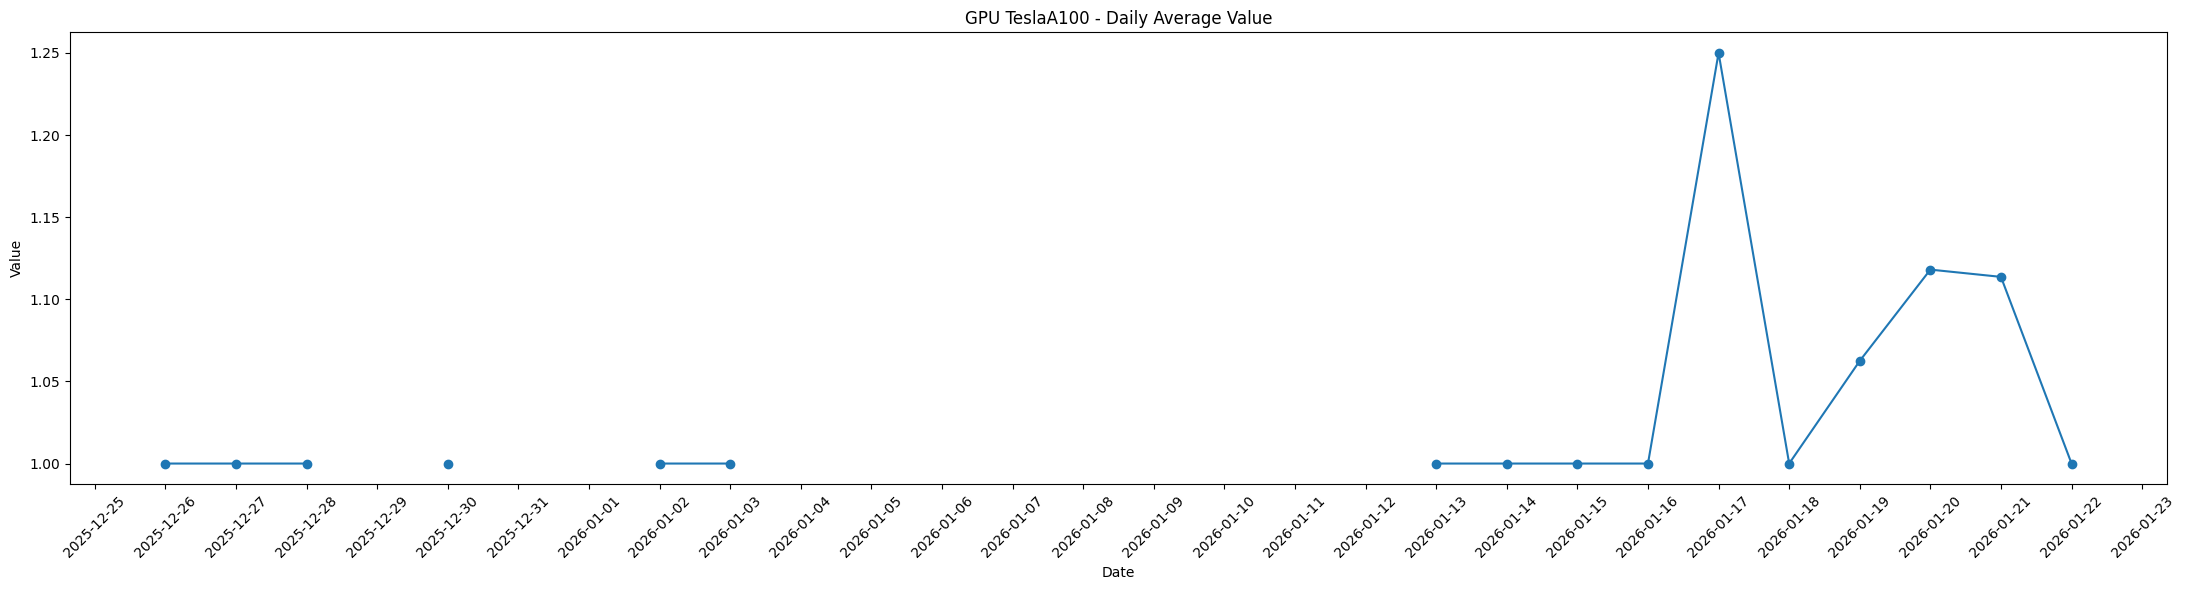

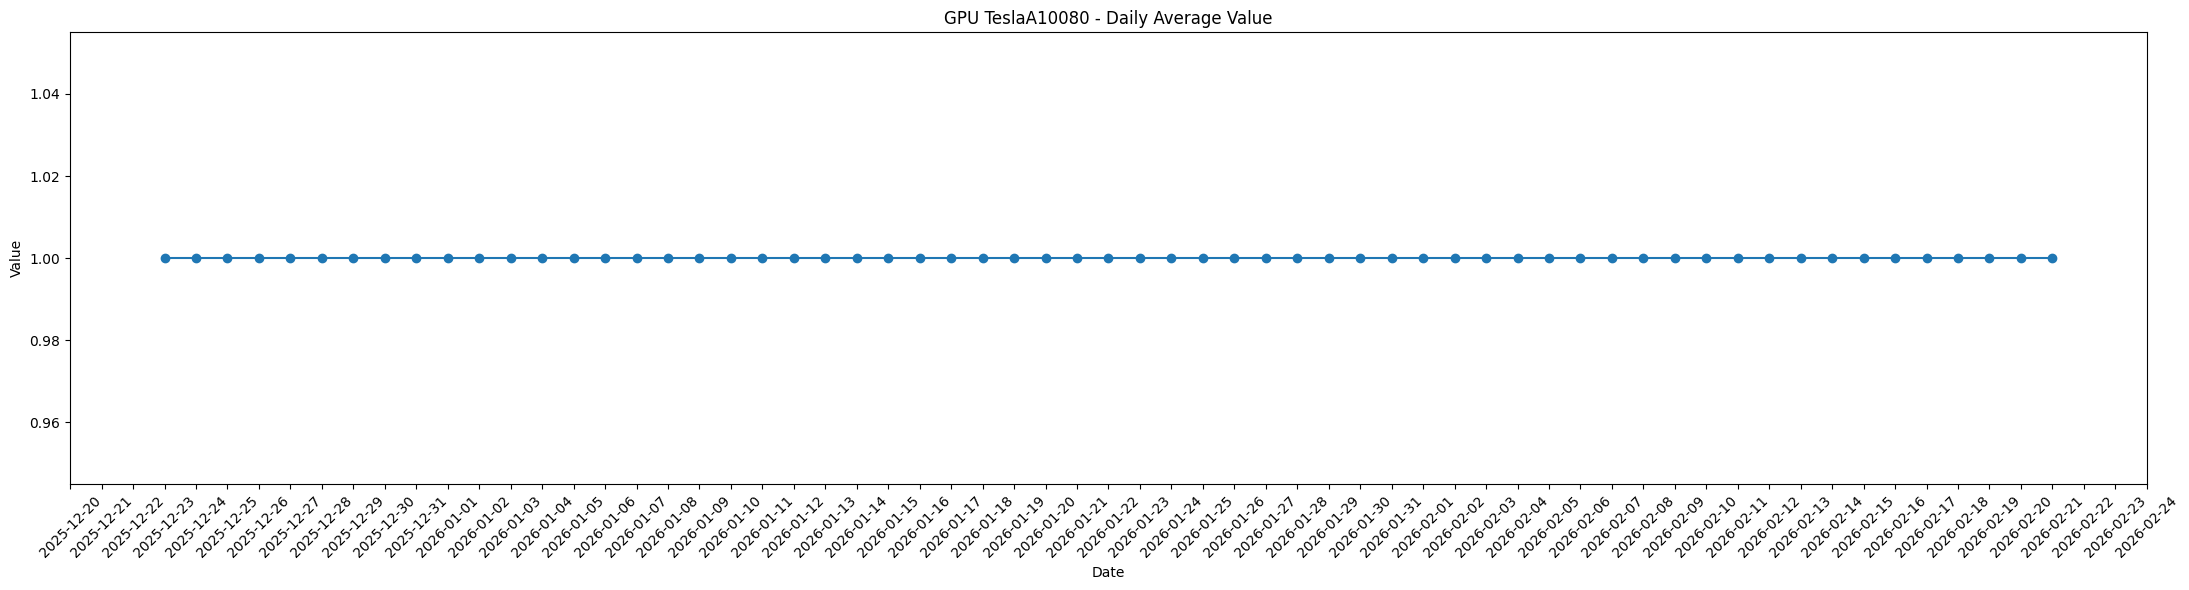

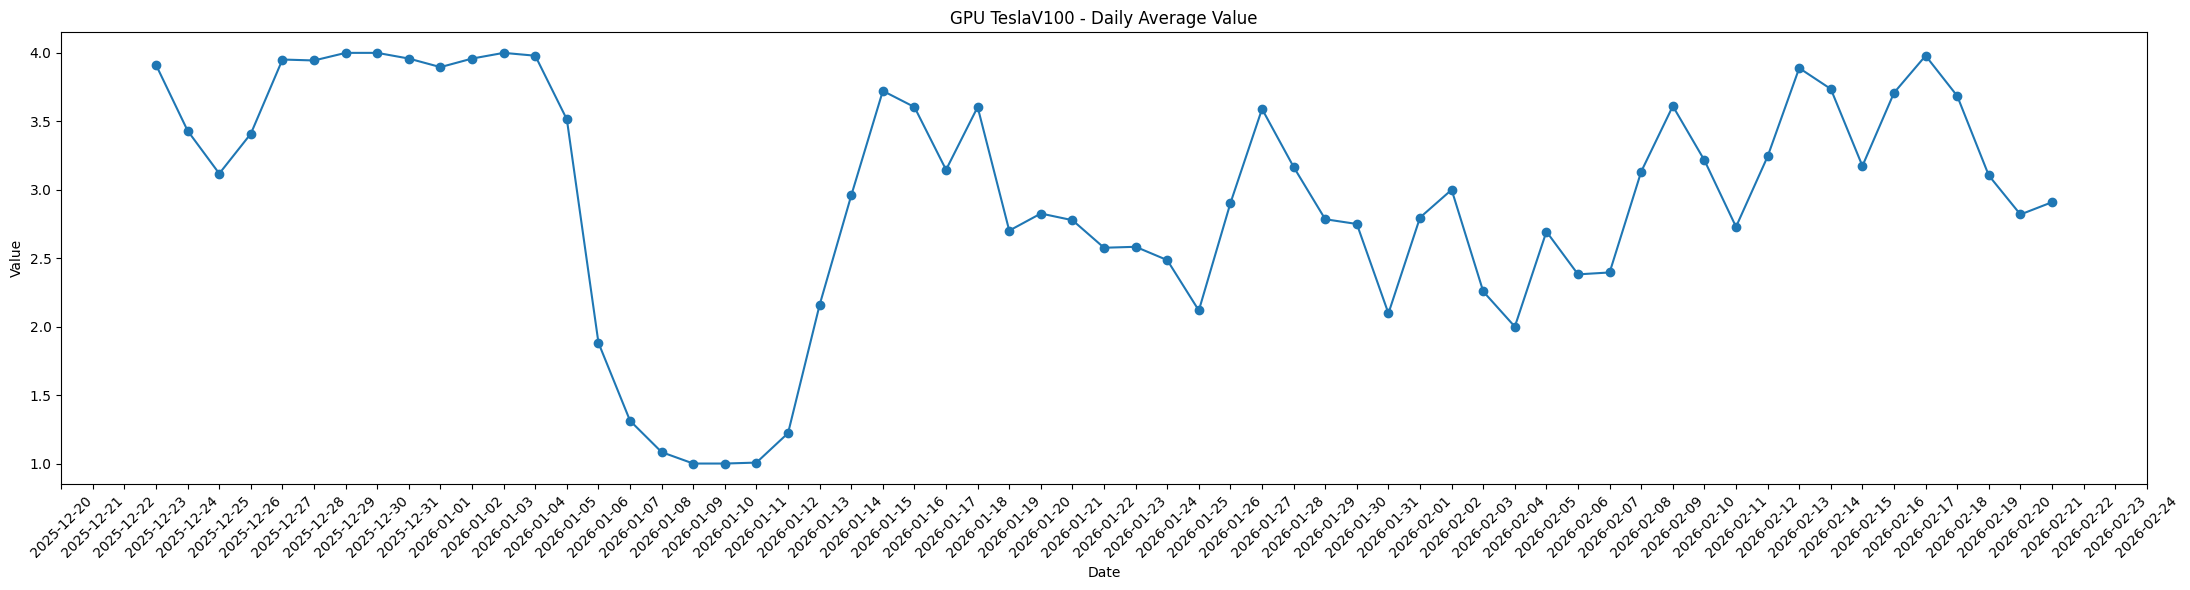

In [19]:
df = df.reset_index()

df["datetime"] = pd.to_datetime(df["datetime"])

df = df.set_index("datetime")
gpus = df["gpu"].unique()

for gpu in gpus:
    gpu_df = df[df["gpu"] == gpu]

    daily = gpu_df["value"].resample("1D").mean()

    fig, ax = plt.subplots(figsize=(22,6))
    ax.plot(daily.index, daily.values, marker='o')

    ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    plt.xticks(rotation=45)
    plt.title(f"GPU {gpu} - Daily Average Value")
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.tight_layout()
    plt.show()